## Property Price Prediction - Assignment Solution

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation



### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
property = pd.read_csv("train.csv")

In [3]:
property.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
property.shape

(1460, 81)

> There are 1460 rows and 81 columns in the Original dataset

In [5]:
# summary of the dataset: 1460 rows, 81 columns
print(property.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
#Basic checks
property.shape

(1460, 81)

In [7]:
property.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# To check column names
property.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
# Let's drop Id column as it has no significance for our regression purpose
property.drop('Id',axis = 1,inplace = True)
property.shape

(1460, 80)

In [10]:
#analysing the categorical data
categoricals = property.select_dtypes(exclude= [np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [11]:
categoricals.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [12]:
# Numerical Variable percentile list 
perc =[.20,.25, .40, .60, .75,.80,.85,.90,.95,.99] 
property.describe(percentiles=perc)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
20%,20.000000,53.000000,7078.400000,5.000000,5.000000,1947.800000,1961.800000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2006.000000,124000.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
40%,30.000000,63.000000,8793.400000,6.000000,5.000000,1965.000000,1980.000000,0.000000,218.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2007.000000,147000.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
60%,60.000000,74.000000,10198.200000,6.000000,5.000000,1984.000000,1998.000000,16.000000,525.600000,0.000000,...,100.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2008.000000,179280.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000


In [13]:
property.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [14]:
#seeking only the numeric features from the data
numeric_features = property.select_dtypes(include = [np.number])
numeric_features.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


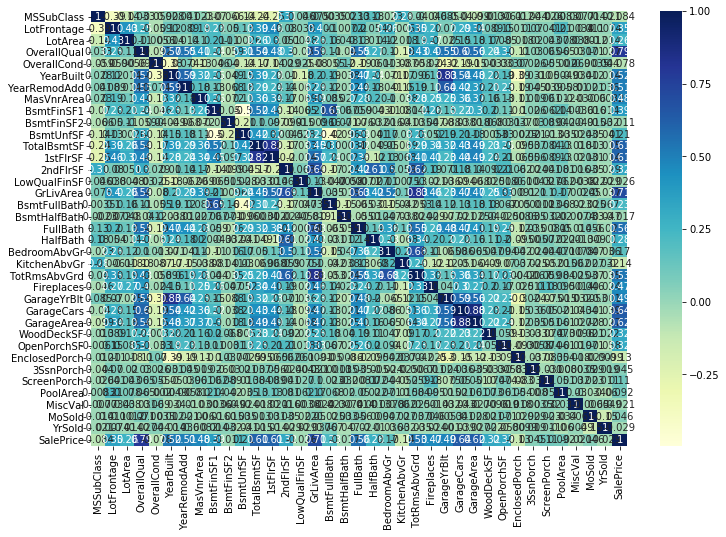

In [15]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (12,8))
#sns.heatmap(property.corr(), annot = True, cmap="YlGnBu")
sns.heatmap(numeric_features.corr(), annot = True, cmap="YlGnBu")
plt.show();

> It's difficult to understand the above graph..let's try to print the top correlated variables

In [16]:
# correlation matrix
cor = numeric_features.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [17]:
print (cor['SalePrice'].sort_values(ascending=False)[:10], '\n') #top 10 values
print ('----------------------')
print (cor['SalePrice'].sort_values(ascending=False)[-5:]) #last 5 values`

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

----------------------
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


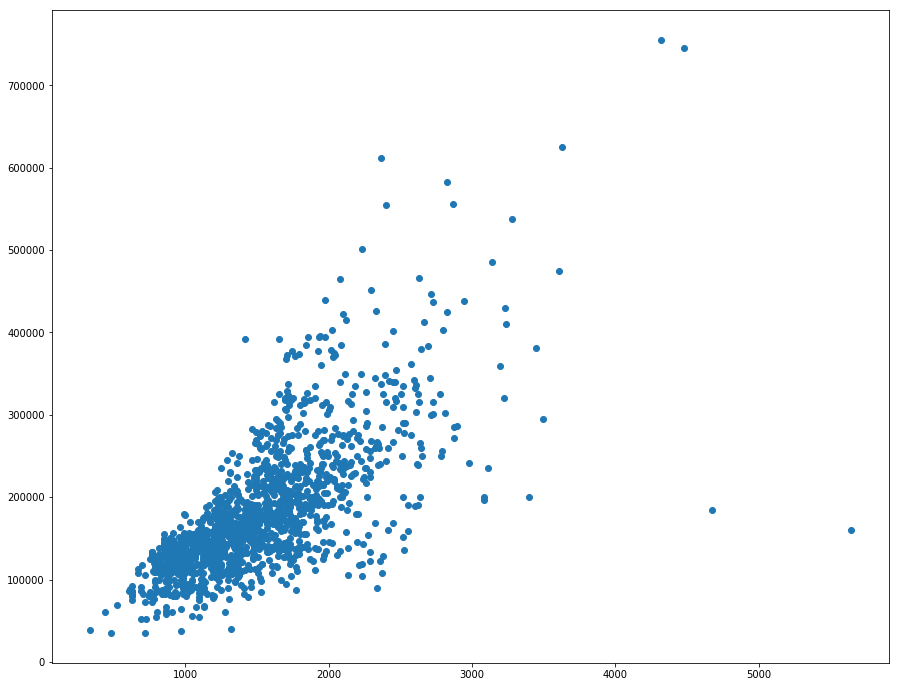

In [18]:
# Let's plot scatter plot GrLivArea Vs SalePrice as GrLivArea is highly correlated
plt.figure(figsize=(15,12))

plt.scatter(x = property.GrLivArea,y = property.SalePrice)

> based on the scatter plot we see that are some 2 outliers when GrLivArea is more than 4000 and when saleprice is less than 200000 ..so let's drop them

In [19]:
# Dropping the outliers noticed above
property.drop(property[(property['GrLivArea'] >4000) & (property['SalePrice']<200000)].index,inplace = True)

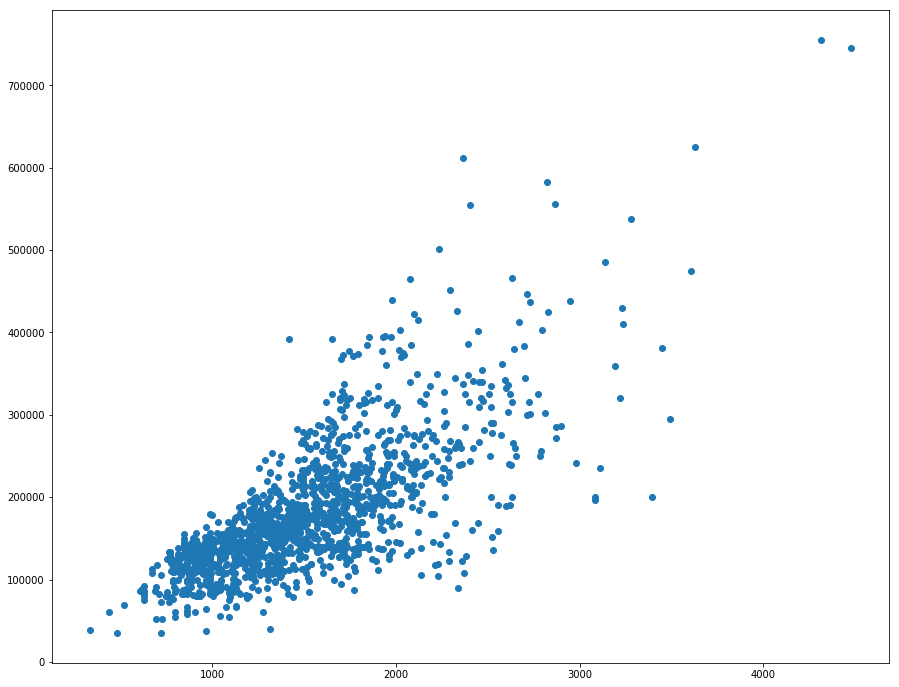

In [20]:
# Re-checking SCatter plot as above to check Outliers removal
plt.figure(figsize=(15,12))

plt.scatter(x = property.GrLivArea,y = property.SalePrice)

> Now the plot looks optimal after removing this outliers

In [21]:
# paiwise scatter plot

#plt.figure(figsize=(20, 10))
#sns.pairplot(numeric_features)
#plt.show()

#### To check Outliers

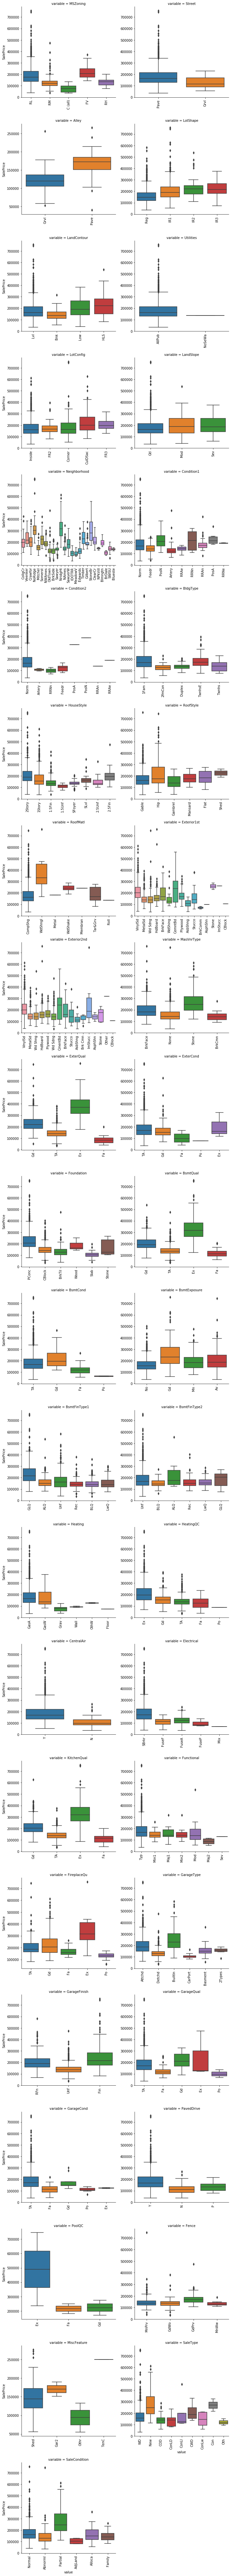

In [22]:
def boxplot(x,y,**kwargs):
            sns.boxplot(x=x,y=y)
            x = plt.xticks(rotation=90)

cat = [f for f in property.columns if property.dtypes[f] == 'object']

p = pd.melt(property, id_vars='SalePrice', value_vars=cat)
g = sns.FacetGrid (p, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value','SalePrice')
g

>> Almost all varaibles have Outliers. Let's not handle outliers as they don't affect Regression Modelling Analysis

### 2. Data Cleansing

In [23]:
# To check rows where columns have Null Values
property.isnull().all(axis=0).sum()

0

In [24]:
# To check Null Values in different columns
property.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1367
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [25]:
# find out the percentage of nulls in data frame.
round(100*(property.isnull().sum()/len(property.index)), 2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.76
LotArea           0.00
Street            0.00
Alley            93.76
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.54
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.33
GarageType        5.56
GarageYrBlt       5.56
GarageFinish      5.56
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [26]:
## Let's re-check again the null values in descending order 
missing_values = property.isnull().sum()

missing_values[missing_values>0].sort_values(ascending = False)

PoolQC          1452
MiscFeature     1404
Alley           1367
Fence           1177
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

> 1. We see columns Alley,PoolQC,Fence,MiscFeature, FireplaceQu all have very high Null values more than 47% 
> 2. Let's impute all the Null Values appropriately below

### Treatment of Null Values

> Impute Null Values below

In [27]:
## Let's replace the Null Values in all Categorical Values with 'None'

columns1 = ["PoolQC" , "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish",
"GarageType", "BsmtExposure", "BsmtCond", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType","Electrical"]
for col1 in columns1:
    property[col1].fillna('None',inplace = True)

>> All the Null Values in the Categorical Columns has been imputed with 'None'


In [28]:
## Let's replace the Null Values in Year column in GarageYrBlt to 0
#property['GarageYrBlt'].fillna(0,inplace = True)

In [29]:
# The mean value of column 'GarageYrBlt'.
means_GarageYrBlt = round(property['GarageYrBlt'].mean(),0)
means_GarageYrBlt

1978.0

In [30]:
# Replace Null columns with Mean values of means_GarageYrBlt.
property['GarageYrBlt'].fillna(means_GarageYrBlt,inplace=True)

In [31]:
## Let's replace the few Null Values in MasVnrArea, Electrical with 0
property['MasVnrArea'].fillna(0,inplace= True)


>> The Null Value in the Numerical column MasVnrArea has been imputed with zero

>> Only LotFrontage field now is left for Null Treatment
>> We can Impute the Null values with the median of LotFrontage
>> We can calculate the Median based on LotFrontage for a Neighbourhood

In [32]:
# To calaculate Mean, Median, COunt of LotFrontage for a Neighbourhood
property.groupby(['Neighborhood'])[['LotFrontage']].agg(['mean','median','count'])

LotFrontage             
                    mean median count
Neighborhood                         
Blmngtn        47.142857   43.0    14
Blueste        24.000000   24.0     2
BrDale         21.562500   21.0    16
BrkSide        57.509804   52.0    51
ClearCr        83.461538   80.0    13
CollgCr        71.682540   70.0   126
Crawfor        71.804878   74.0    41
Edwards        64.811111   64.5    90
Gilbert        79.877551   65.0    49
IDOTRR         62.500000   60.0    34
MeadowV        27.800000   21.0    15
Mitchel        70.083333   73.0    36
NAmes          76.462366   73.0   186
NPkVill        32.285714   24.0     7
NWAmes         81.288889   80.0    45
NoRidge        91.878788   91.0    33
NridgHt        81.881579   88.5    76
OldTown        62.788991   60.0   109
SWISU          58.913043   60.0    23
Sawyer         74.437500   71.0    48
SawyerW        71.500000   66.5    50
Somerst        64.666667   73.5    78
StoneBr        62.700000   61.5    20
Timber         80.133333   85.0    30
Veenker        59.714286   68.0     7

In [33]:
#impute lotfrontage by median of neighborhood
lot_frontage_grp = property['LotFrontage'].groupby(property['Neighborhood'])

for key, group in lot_frontage_grp:
                idx = (property['Neighborhood'] == key) & (property['LotFrontage'].isnull())
                property.loc[idx, 'LotFrontage'] = group.median()

In [34]:
## Let's re-check again the null values in descending order 
missing_values = property.isnull().sum()

missing_values[missing_values>0].sort_values(ascending = False)

Series([], dtype: int64)

>> All the NULL Values have been Succesfully imputed and we don't have any Null Values left

In [35]:
#To check duplicate rows
property.duplicated().sum()

0

> There are no any duplicates in the dataframe

## 3. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
scaler = MinMaxScaler()

In [38]:
## To retrieve all Categorical Columns
categoricals.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [39]:
property.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [40]:
numeric_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [41]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']

property[num_vars] = scaler.fit_transform(property[num_vars])

In [42]:
# split into X and y
X = property[['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]

y = property['SalePrice']
#y = property.SalePrice

In [43]:
# creating dummy variables for categorical variables

# subset all categorical variables
property_categorical = X.select_dtypes(include=['object'])
property_categorical.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [44]:
# convert into dummies
property_dummies = pd.get_dummies(property_categorical, drop_first=True)
property_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [45]:
# drop categorical variables 
X = X.drop(list(property_categorical.columns), axis=1)

In [46]:
# concat dummy variables with X
X = pd.concat([X, property_dummies], axis=1)

In [47]:
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=259)

In [48]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 4. Model Building and Evaluation

## Ridge and Lasso Regression

Let's now try predicting property prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [49]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [50]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007521,0.005260,0.000607,0.000149,0.0001,{'alpha': 0.0001},-21642.161973,-20220.884635,-17585.025912,-22764.853184,...,-20294.225217,1807.729140,24,-11611.296264,-11895.754745,-12116.807534,-12466.554180,-11929.664004,-12004.015345,282.184694
1,0.004629,0.000553,0.000572,0.000139,0.001,{'alpha': 0.001},-21637.358799,-19844.007044,-17493.595175,-20256.165165,...,-19672.295046,1361.785848,23,-11613.541927,-11900.771647,-12340.610166,-12670.327125,-12106.878252,-12126.425823,362.230690
2,0.003784,0.000125,0.000385,0.000030,0.01,{'alpha': 0.01},-21568.723652,-19135.931374,-17497.480010,-18529.203737,...,-19128.573354,1343.220439,22,-11619.758501,-11929.811227,-12548.192602,-12859.247134,-12286.914738,-12248.784840,438.447582
3,0.003705,0.000069,0.000366,0.000001,0.05,{'alpha': 0.05},-21326.069256,-18888.801342,-17407.076392,-17711.072701,...,-18792.204470,1381.607009,21,-11647.060355,-12025.799305,-12612.569083,-12936.195663,-12336.188667,-12311.562615,448.241386
4,0.003757,0.000115,0.000381,0.000012,0.1,{'alpha': 0.1},-21107.267523,-18628.208119,-17301.001738,-17356.909627,...,-18567.076883,1381.260399,20,-11703.533322,-12131.778881,-12658.316055,-12999.461191,-12386.467973,-12375.911484,442.802696


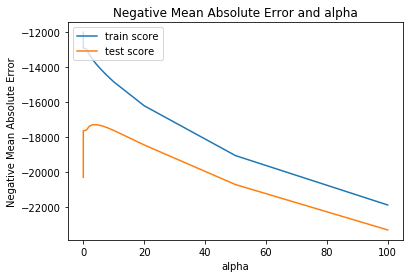

In [51]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

> Optimal value of Lambda i.e. Alpha for Ridge from the above plot is 5

In [52]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.72925108e+04,  1.69637279e+04,  2.80670873e+04,  4.75417054e+04,
        2.71358822e+04,  1.74258044e+04,  1.16535617e+04,  3.01181525e+04,
        4.59616539e+04,  1.33336817e+04,  1.98180485e+04,  5.19378998e+04,
        5.66503648e+04,  5.53071914e+04, -7.09733413e+03,  6.61747539e+04,
        4.74267223e+03, -2.93187540e+03,  2.13544267e+04,  9.60019033e+03,
       -1.04469455e+04, -1.37610097e+04,  1.86581803e+04,  1.72932371e+04,
       -2.26587129e+03,  1.98090429e+04,  1.71281855e+04,  1.22688309e+04,
        1.05256333e+04, -2.80413191e+03,  5.40673098e+03,  2.44151539e+03,
        1.77508903e+04, -5.67275096e+02, -3.06718374e+03, -2.44065344e+03,
        1.12328160e+04,  2.26901745e+02,  7.96283726e+03,  2.83972240e+03,
        4.19809142e+03, -2.09342573e+02, -3.05876403e+02,  3.11145272e+03,
        5.44461136e+03,  8.82779695e+01,  4.84340167e+03, -1.76617311e+03,
        2.62586391e+03, -4.18095124e+03,  1.01419891e+04, -9.00669862e+03,
       -5.14060695e+03, -

## Lasso

In [53]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   10.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [54]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.083077,0.004734,0.000479,0.000084,0.0001,{'alpha': 0.0001},-21147.587532,-19086.370807,-17490.901327,-22573.122247,...,-19862.121800,1785.948654,27,-11619.820797,-11906.452527,-12402.719439,-12694.182077,-12154.266483,-12155.488265,374.239016
1,0.075041,0.001074,0.000397,0.000008,0.001,{'alpha': 0.001},-21143.226130,-19085.830487,-17494.575164,-22566.632528,...,-19860.434357,1782.490506,26,-11619.823175,-11906.468498,-12402.776415,-12694.161199,-12154.311496,-12155.508157,374.237698
2,0.074885,0.000684,0.000424,0.000051,0.01,{'alpha': 0.01},-21143.066509,-19080.412872,-17508.445801,-22499.951294,...,-19847.371195,1759.740229,25,-11619.918571,-11906.711498,-12403.479921,-12694.066757,-12154.870225,-12155.809394,374.243583
3,0.076693,0.001851,0.000423,0.000030,0.05,{'alpha': 0.05},-21139.400918,-19056.235571,-17556.197647,-22185.176020,...,-19782.385380,1658.318726,24,-11620.337265,-11907.825316,-12407.143269,-12694.139946,-12157.564781,-12157.402115,374.482417
4,0.076364,0.000753,0.000450,0.000054,0.1,{'alpha': 0.1},-21133.377252,-19058.634060,-17599.441627,-21787.307931,...,-19703.348602,1537.253112,23,-11620.887518,-11909.272666,-12411.968833,-12694.553913,-12161.280186,-12159.592623,374.898240


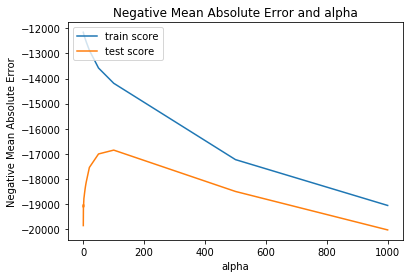

In [55]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

> Optimal value of Lambda i.e. Alpha for Lasso from the above plot is 100

In [56]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
lasso.coef_

array([-2.32255660e+04,  2.38207045e+03,  5.26576401e+04,  6.25798328e+04,
        3.97348420e+04,  3.96046918e+04,  8.58825862e+03,  2.72726398e+04,
        3.38237660e+04,  0.00000000e+00, -0.00000000e+00,  8.74952199e+04,
        0.00000000e+00,  2.62575285e+04, -1.10063044e+04,  2.25898291e+05,
        0.00000000e+00, -0.00000000e+00,  3.78631333e+02,  0.00000000e+00,
       -1.55525884e+04, -3.19555712e+03,  0.00000000e+00,  7.99821946e+03,
        0.00000000e+00,  2.11084479e+04,  3.33072023e+02,  4.80533382e+03,
        3.46061163e+03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -1.43305933e+03, -3.30532811e+02,
        9.45895533e+03, -0.00000000e+00,  4.63549214e+03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.17720785e+02, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  8.40210718e+03, -3.20042912e+03,
       -0.00000000e+00,  

In [58]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=X_train.columns)
FI_lasso.sort_values("Feature Importance",ascending=False)

,Feature Importance
GrLivArea,225898.290916
TotalBsmtSF,87495.219870
OverallQual,62579.832770
LotArea,52657.640077
Neighborhood_NoRidge,41197.836631
OverallCond,39734.841968
YearBuilt,39604.691800
BsmtFinSF1,33823.766029
Neighborhood_StoneBr,29658.618934
MasVnrArea,27272.639832


> GrLivArea	
> TotalBsmtSF	
> OverallQual	
> LotArea	
> Neighborhood_NoRidge	

ARE THE top 5 fetaures that influence SalePrice

In [59]:
# Import linear models
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Fit the models
#lasso.fit(X_train, y_train)
#ridge.fit(X_train, y_train)
# Print scores, MSE, and coefficients
print("lasso score:", lasso.score(X_train, y_train))
print("ridge score:",ridge.score(X_train, y_train))
print("lasso MSE:", mean_squared_error(y_train, lasso.predict(X_train)))
print("ridge MSE:", mean_squared_error(y_train, ridge.predict(X_train)))
print("lasso coef:", lasso.coef_)
print("ridge coef:", ridge.coef_)

lasso score: 0.9289686402260772
ridge score: 0.9300939212641584
lasso MSE: 475746674.8414797
ridge MSE: 468209881.03895086
lasso coef: [-2.32255660e+04  2.38207045e+03  5.26576401e+04  6.25798328e+04
  3.97348420e+04  3.96046918e+04  8.58825862e+03  2.72726398e+04
  3.38237660e+04  0.00000000e+00 -0.00000000e+00  8.74952199e+04
  0.00000000e+00  2.62575285e+04 -1.10063044e+04  2.25898291e+05
  0.00000000e+00 -0.00000000e+00  3.78631333e+02  0.00000000e+00
 -1.55525884e+04 -3.19555712e+03  0.00000000e+00  7.99821946e+03
  0.00000000e+00  2.11084479e+04  3.33072023e+02  4.80533382e+03
  3.46061163e+03 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -1.43305933e+03 -3.30532811e+02
  9.45895533e+03 -0.00000000e+00  4.63549214e+03 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.17720785e+02 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  8.40210718e+03 -3.20042912e+03
 -0.00000000e+00  0.

> lasso score: 0.9289686402260772
> ridge score: 0.9300939212641584

For TRAIN Dataset

In [60]:
# Now Apply for TEST
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Fit the models
lasso.fit(X_test, y_test)
ridge.fit(X_test, y_test)
# Print scores, MSE, and coefficients
print("lasso test score:", lasso.score(X_test, y_test))
print("ridge test score:",ridge.score(X_train, y_train))
print("lasso test MSE:", mean_squared_error(y_test, lasso.predict(X_test)))
print("ridge test MSE:", mean_squared_error(y_test, ridge.predict(X_test)))
print("lasso test coef:", lasso.coef_)
print("ridge test coef:", ridge.coef_)

lasso test score: 0.9434100119589383
ridge test score: 0.862284494141041
lasso test MSE: 306034389.48655427
ridge test MSE: 349214885.44546896
lasso test coef: [-1.89582734e+04  0.00000000e+00  0.00000000e+00  9.18107497e+04
  3.11128301e+04  0.00000000e+00  1.11023254e+04  8.66031955e+03
  5.11753150e+04  0.00000000e+00  0.00000000e+00  6.65745399e+03
  3.65719518e+04  0.00000000e+00 -0.00000000e+00  1.67960884e+05
  9.56516631e+03  0.00000000e+00  2.61246545e+03  5.49732386e+03
 -0.00000000e+00 -1.14131692e+03  2.24531803e+04  1.05721745e+04
  1.14992846e+03  1.23789256e+04  4.05786641e+04  1.38858588e+04
  1.35610710e+04  4.86131116e+02  0.00000000e+00  1.97087295e+04
  8.66835360e+03 -0.00000000e+00 -0.00000000e+00  1.58973012e+03
  0.00000000e+00  0.00000000e+00  5.72926145e+03 -5.30764330e+01
  2.81892537e+04 -0.00000000e+00 -0.00000000e+00  1.46665401e+04
  0.00000000e+00 -7.24672782e+02  2.95466017e+01 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  4.54375278e+02 -7.48129382

> lasso test score: 0.9434100119589383
> ridge test score: 0.862284494141041
    
For TEST DATASET

In [61]:
# Make necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso()
ridge = linear_model.Ridge()
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')
gridridge = GridSearchCV(ridge, parameters, scoring ='r2')

# Fit models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train)
gridridge.fit(X_train, y_train)
linear.fit(X_train, y_train)
print("ridge best parameters:", gridridge.best_params_)
print("lasso best parameters:", gridlasso.best_params_)
print("ridge score:", gridridge.score(X_test, y_test))
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test))
print("ridge MSE:", mean_squared_error(y_test, gridridge.predict(X_test)))
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test)))
print("ridge best estimator coef:", gridridge.best_estimator_.coef_)
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)


ridge best parameters: {'alpha': 1.8000000000000003}
lasso best parameters: {'alpha': 24.0}
ridge score: 0.8816759042573074
lasso score: 0.8831464478263197
linear score: -4.4905079319538696e+21
ridge MSE: 708627313.3994739
lasso MSE: 699820423.0361434
linear MSE: 2.6893056326745814e+31
ridge best estimator coef: [-1.55523435e+04  1.96516430e+04  5.56769510e+04  6.38536389e+04
  3.53432450e+04  2.89647596e+04  7.42418860e+03  3.29877118e+04
  5.53773298e+04  1.32208215e+04  1.22878161e+04  5.28251487e+04
  6.70150607e+04  7.32682715e+04 -8.09078035e+03  8.22338580e+04
  3.75094344e+03 -7.16702487e+03  1.40005739e+04  3.22778949e+03
 -2.12155730e+04 -1.74113817e+04  1.47284237e+04  1.80373186e+04
  8.48343813e+02  2.28204937e+04  7.57985173e+03  1.36321574e+04
  8.87613384e+03 -3.03204401e+03  1.20946540e+04  8.81587412e+03
  2.87991409e+04 -3.48601459e+01 -5.03334807e+03 -3.70646175e+03
  9.65744763e+03  7.75574554e+03  1.09182435e+04  8.27560400e+03
  1.77838295e+04 -3.83195489e+03 -3.

> ridge score: 0.8816759042573074
> lasso score: 0.8831464478263197

using GridSearchCV
